### Import Libraries

In [69]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Import Model and helper libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [70]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/devgupta2619/Car_Price_Prediction_with_Machine_Learning/refs/heads/main/car%20data.csv")

### Dataset First View

In [71]:
# Dataset First Look
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Dataset Rows & Columns count

In [72]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


### Dataset Information

In [73]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##Understanding The Variables

In [74]:
# Dataset Columns
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [75]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


##  Data Wrangling

In [76]:
# Defining dependent variable
dependent_variable = ['Selling_Price']
# Adding a 'Current Year' column with a constant value of 2024 to the DataFrame
df['Current Year'] = 2024

# Calculating the age of the vehicles
df['no_year'] = df['Current Year'] - df['Year']

# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current Year'], axis=1, inplace=True)

# New updated DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


##  Data Vizualization - Understand the relationships between variables

#### Chart - 1 : Top 10 Most Selling Car

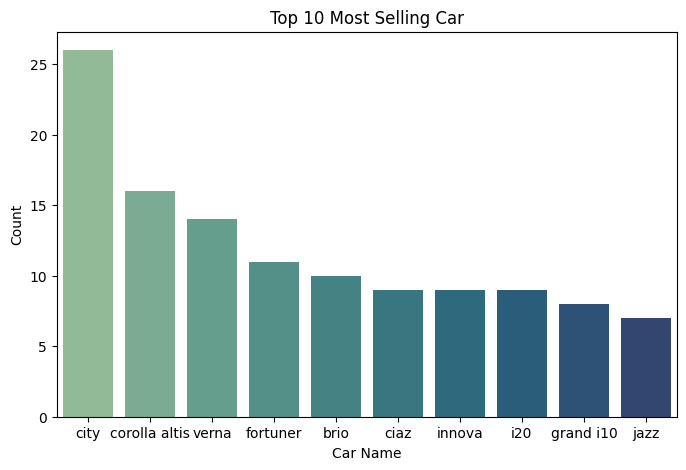

In [77]:
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

#### Chart - 2 : Categorical Variable vs Target Variable

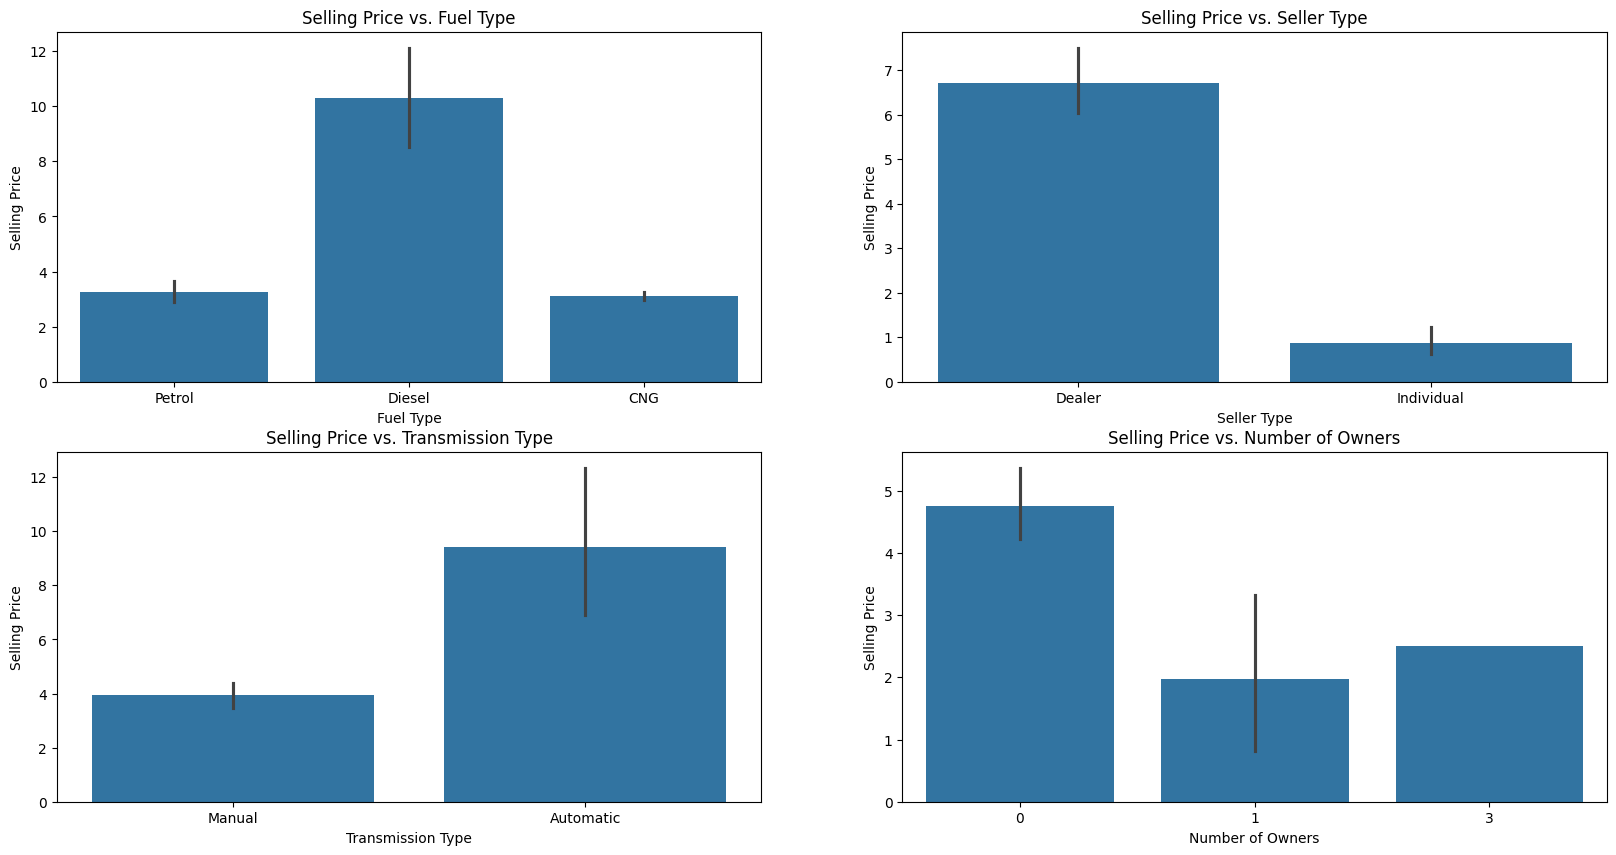

In [78]:
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

#### Chart - 3 : Driven Kilometers vs Selling Price

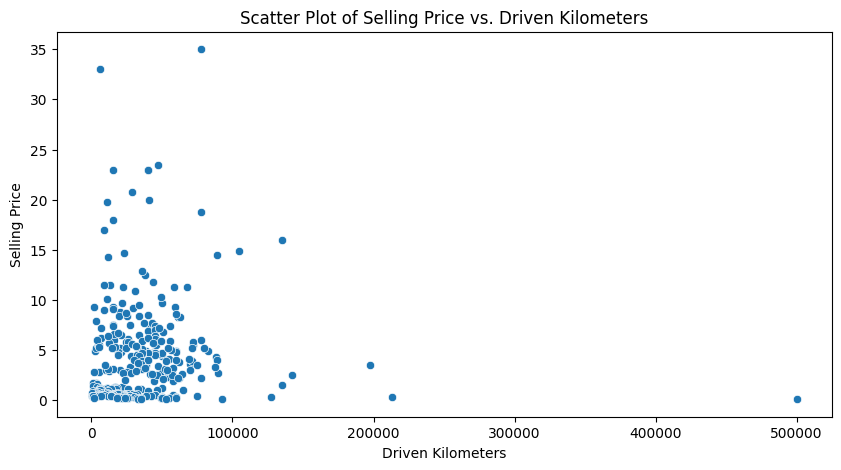

In [79]:
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

#### Chart - 4 - Correlation Heatmap

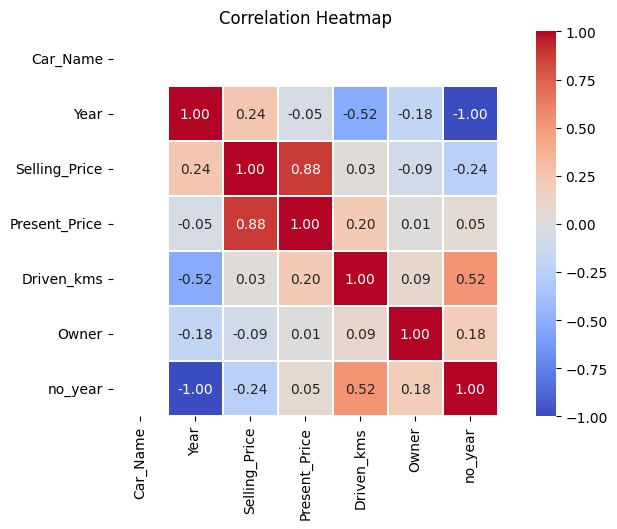

In [80]:
# Convert non-numeric columns to numeric (this will set non-convertible values to NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


##  Feature Engineering & Data Pre-processing

### Handling Outliers

In [81]:
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

### Categorical Encoding

In [82]:
# Before Categorical Encoding, Remove the 'Car Name' as it's no longer needed
df.drop(['Car_Name'], axis=1, inplace=True)

In [83]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

### Feature Manipulation & Selection

####  Feature Manipulation

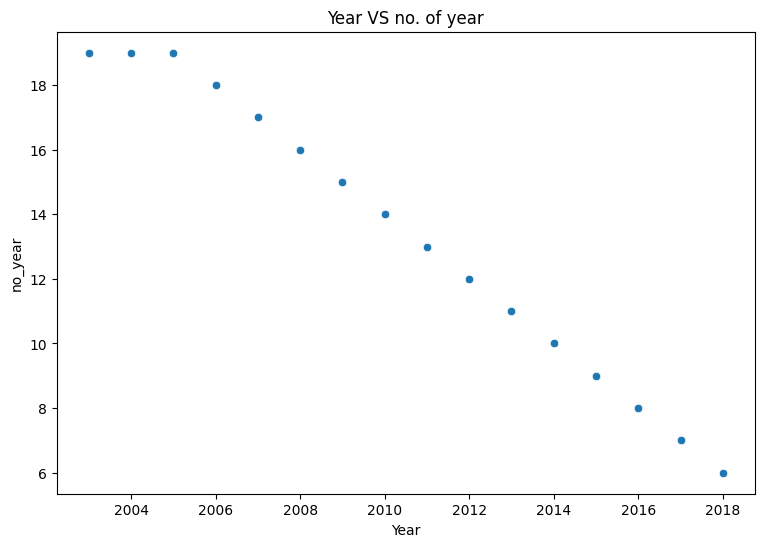

In [84]:
# Manipulate Features to minimize feature correlation and create new features
# We see that the Year and no_year are negatively highly correlated
# Plotting Scatter plot to visualize the relationship between Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [85]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [86]:
# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['Year'], axis=1, inplace=True)

####  Feature Selection

In [87]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [88]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [89]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [90]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [91]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,10.0
1,9.54,43000.0,0.0,11.0
2,9.85,6900.0,0.0,7.0
3,4.15,5200.0,0.0,13.0
4,6.87,42450.0,0.0,10.0
...,...,...,...,...
296,11.60,33988.0,0.0,8.0
297,5.90,60000.0,0.0,9.0
298,11.00,87934.0,0.0,15.0
299,12.50,9000.0,0.0,7.0


In [92]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.171618
1,Driven_kms,4.651078
2,Owner,1.060334
3,no_year,4.425180


In [93]:
# This is the final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,10.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,11.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,7.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,13.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,10.0,False,True,False,True,False,False,True


###  Data Transformation

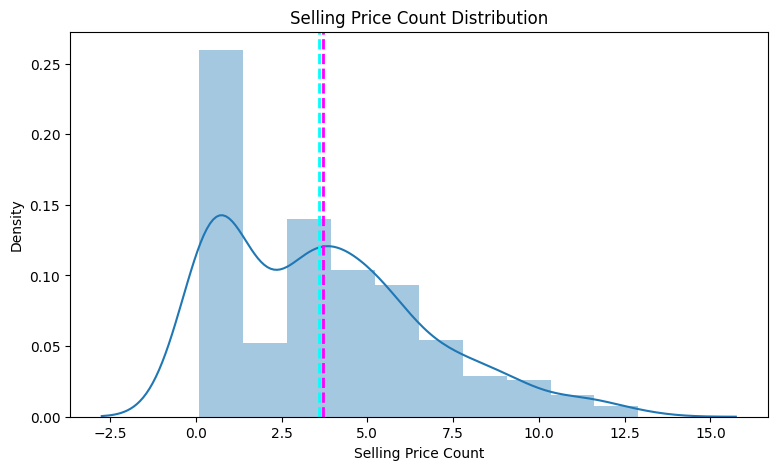

In [94]:
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [95]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Selling_Price,0.757016


In [96]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [97]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

### Data Scaling

In [98]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [99]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

### Data Splitting

In [100]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts()

,count
Selling_Price,
1.526056,11
0.470004,6
0.371564,6
0.182322,5
1.609438,5
...,...
1.294727,1
1.266948,1
1.208960,1


## ML Model Implementation

In [101]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [102]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Random Forest

In [103]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### Evaluation of Model

MSE : 0.5703630266491334
RMSE : 0.7552238255306393
MAE : 0.4964348369318066
Train R2 : 0.986129340989375
Test R2 : 0.930576101061694
Adjusted R2 :  0.920909482222183


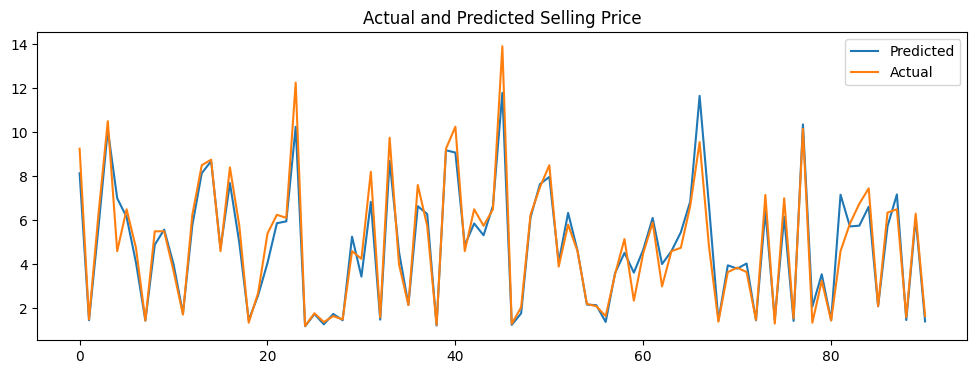

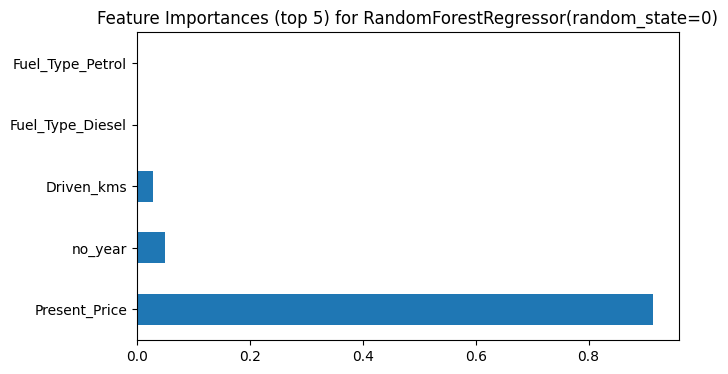

In [104]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [105]:
# Updated Evaluation Metric Score chart
score

,Random forest
MSE,0.570363
RMSE,0.755224
MAE,0.496435
Train R2,0.986129
Test R2,0.930576
Adjusted R2,0.920909


Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 93% respectively, which seems to be a good model for prediction.

####  Cross- Validation & Hyperparameter Tuning

In [106]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [107]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [108]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [109]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [110]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [111]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 2.1598547137265682
RMSE : 1.469644417444767
MAE : 1.0105183093409997
Train R2 : 0.7710484475746359
Test R2 : 0.7371050920882742
Adjusted R2 :  0.7004994719992997


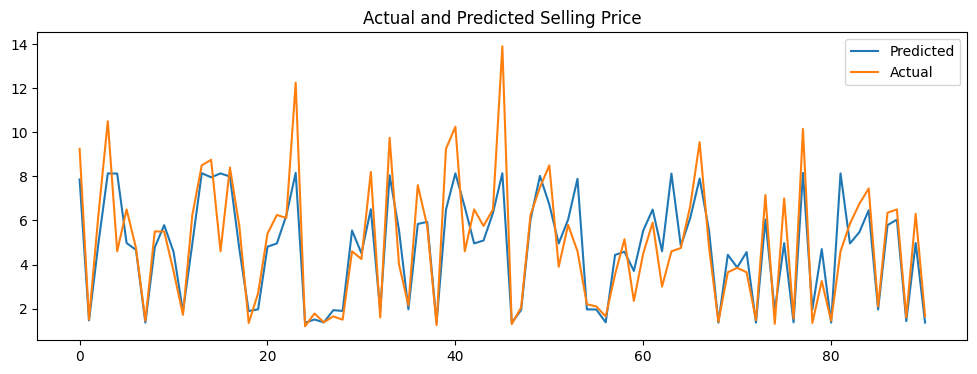

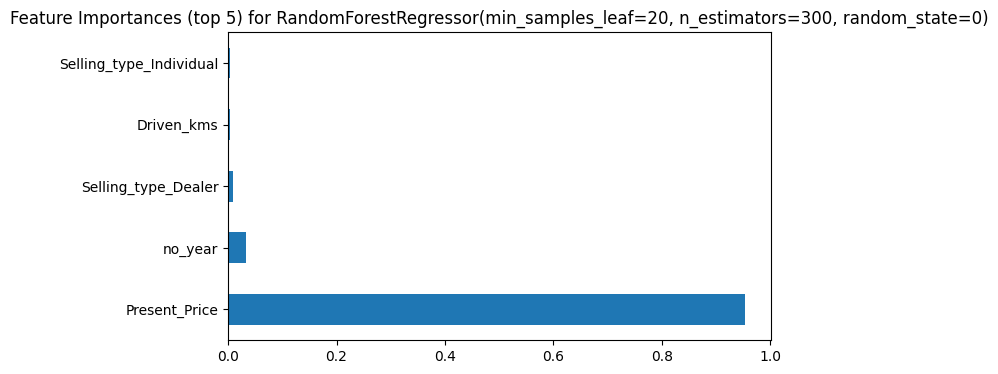

In [112]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

##### Final Scores

In [113]:
# Updated Evaluation Metric Score chart
score

,Random forest,Random forest tuned
MSE,0.570363,2.159855
RMSE,0.755224,1.469644
MAE,0.496435,1.010518
Train R2,0.986129,0.771048
Test R2,0.930576,0.737105
Adjusted R2,0.920909,0.700499


### ML Model - 2 : Extreme Gradient Boosting Regressor

In [114]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### Evaluation of Model

MSE : 0.913753131875323
RMSE : 0.9559043528906661
MAE : 0.5729008607549981
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


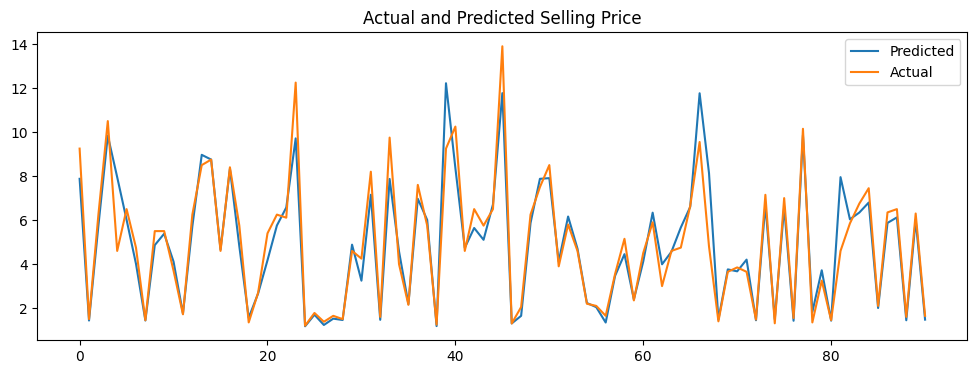

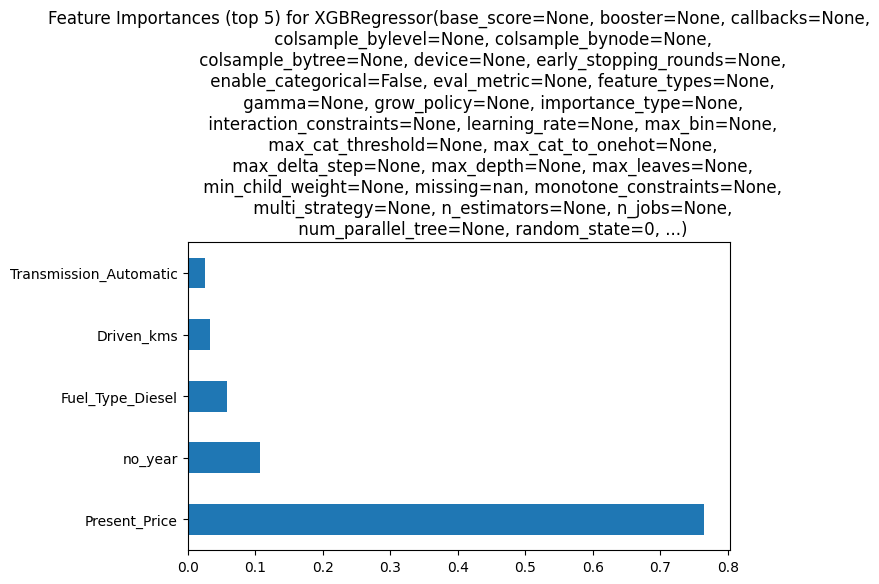

In [115]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [116]:
# Updated Evaluation Metric Score chart
score

,Random forest,Random forest tuned,Extreme Gradient Boosting Regressor
MSE,0.570363,2.159855,0.913753
RMSE,0.755224,1.469644,0.955904
MAE,0.496435,1.010518,0.572901
Train R2,0.986129,0.771048,0.999985
Test R2,0.930576,0.737105,0.888779
Adjusted R2,0.920909,0.700499,0.873293


Using Extreme Gradient Boosting Regressor i have got accuracy around 99% and 88% on train and test data respectively. It is overfitting the model's training accuracy is almost 100%.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [118]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [119]:
# Best parameters for XG boost Model
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [120]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [121]:
# Fitting model
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

MSE : 0.9137531306406798
RMSE : 0.9559043522448675
MAE : 0.5729008515850528
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


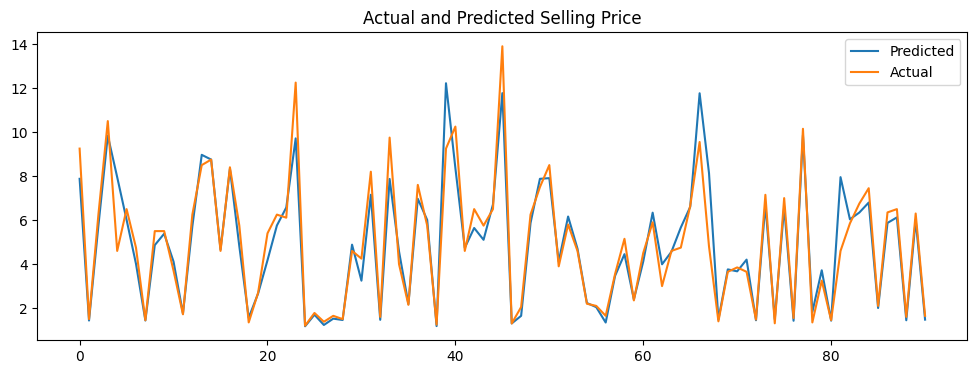

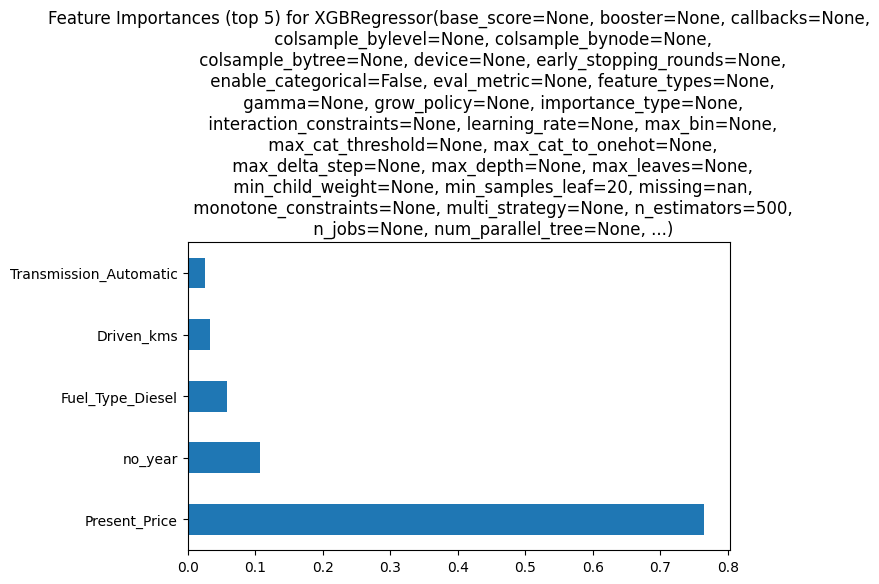

In [123]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

##### Final Sscores

In [124]:
# Updated Evaluation Metric Score chart
score

,Random forest,Random forest tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,0.570363,2.159855,0.913753,0.913753
RMSE,0.755224,1.469644,0.955904,0.955904
MAE,0.496435,1.010518,0.572901,0.572901
Train R2,0.986129,0.771048,0.999985,0.999985
Test R2,0.930576,0.737105,0.888779,0.888779
Adjusted R2,0.920909,0.700499,0.873293,0.873293


After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

### Plot R2 scores for each model

In [125]:
score.columns

Index(['Random forest', 'Random forest tuned',
       'Extreme Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

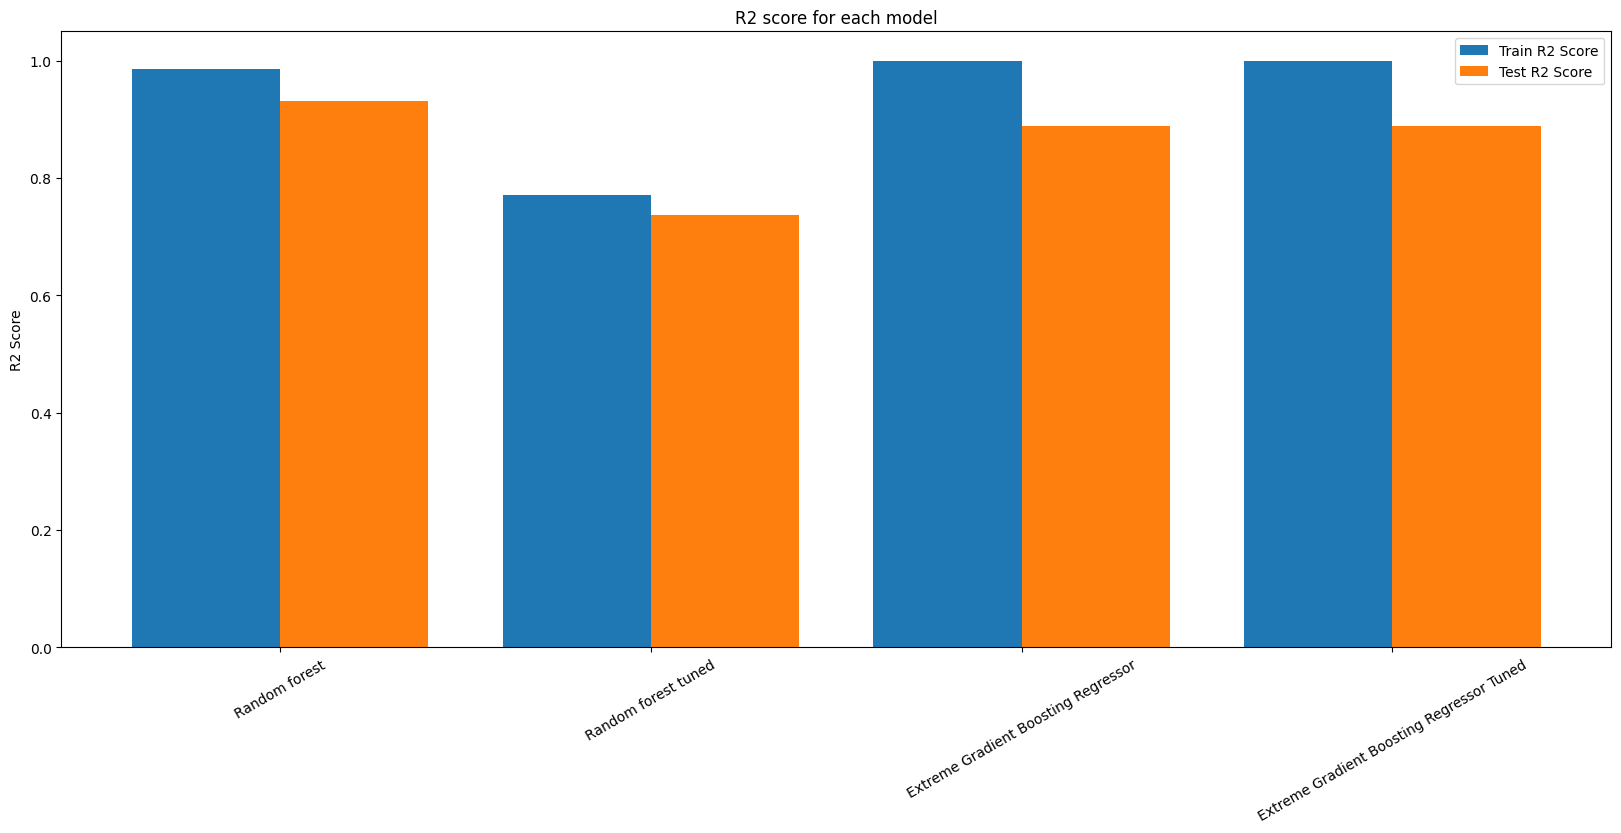

In [126]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()